<p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold"><br>
Projet 6 :<br><br>
Catégorisez automatiquement des questions<br><br>
</p><br>

* **Data Source / Data Source :** 
    - Data :
        - Outils d'extraction de data : https://data.stackexchange.com/stackoverflow
        - Script : https://github.com/EricJacquesPro/TextCategorization/blob/master/SQL/ExtractionDonnees.sql
    - Source Python : https://github.com/EricJacquesPro/TextCategorization
* **Description / Description : ** Projet 6 de la formation Data Scientist Proposée par OpenClassroom
    - Analyse Supervised
    - Entrainement Supervised
* **Auteur / Author : ** Eric JACQUES 
* **Date : ** 16/06/2020 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
I - Sélection des datas entrantes</p>

In [ ]:
import sys
import os
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE

sys.path.insert(0, './Python/')
'''
python class for the data engineering (reading, cleaning, training...)
localised in ./Python
'''
from tagText import TagText 
tagText = TagText()

tagText.nombre_post_entree = 35000
tagText.precision = 35000

print(tagText.urlDirectory)#folder for cvs file generated by SQL query (cf. I) 
print(tagText.fileName)#name of the cvs file generated by SQL query (cf. I)
data_question = tagText.read_source()
print(data_question.head())


data_preprocessed = data_question['body'].apply(tagText.preprocessing)

print(data_preprocessed.head())




C:\Users\naru_\Anaconda3\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Data/
QuestionVsTags.csv
         Id                                               body  \
0  11227809  <p>Here is a piece of C++ code that shows some...   
1    927358  <p>I accidentally committed the wrong files to...   
2   2003505  <p>I want to delete a branch both locally and ...   
3    292357  <p>What are the differences between <code>git ...   
4    477816  <p>I've been messing around with <a href="http...   

                                               title  \
0  Why is processing a sorted array faster than p...   
1  How do I undo the most recent local commits in...   
2  How do I delete a Git branch locally and remot...   
3  What is the difference between 'git pull' and ...   
4             What is the correct JSON content type?   

                                                tags  \
0  <java><c++><performance><optimization><branch-...   
1  <git><version-control><git-commit><undo><pre-c...   
2  <git><version-control><git-branch><git-push><g...   
3        <git><ve

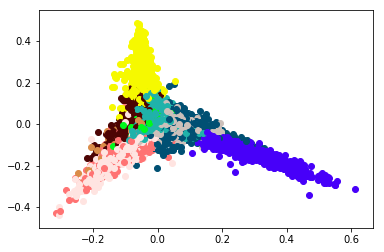

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 3

documents = data_preprocessed[0:tagText.precision].unique()

tf_idf_vectorizer = TfidfVectorizer(
            analyzer="word",
            max_df=0.95,
            min_df=2,
            max_features=50000,
            stop_words='english',
            use_idf=True,
            smooth_idf=True
        )
#TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(2, 3))
tf_idf_matrix = tf_idf_vectorizer.fit_transform(documents)
del documents
# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tf_idf_matrix)

X = tf_idf_matrix.todense()


# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()



# ----------------------------------------------------------------------------------------------------------------------
# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
tagText.plt.scatter(Y[:, 0], Y[:, 1], cmap=tagText.plt.cm.Spectral)
tagText.plt.show()
        

In [ ]:
print("bou")